Chapter 23
# 谱聚类
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.linalg import sqrtm as sqrtm

## 数据

In [2]:
np.random.seed(0)

n_samples = 500;
# 样本数据的数量

dataset = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
# 生成环形数据

X, y = dataset
# X 特征数据，y 标签数据
X = StandardScaler().fit_transform(X)
# 标准化数据集

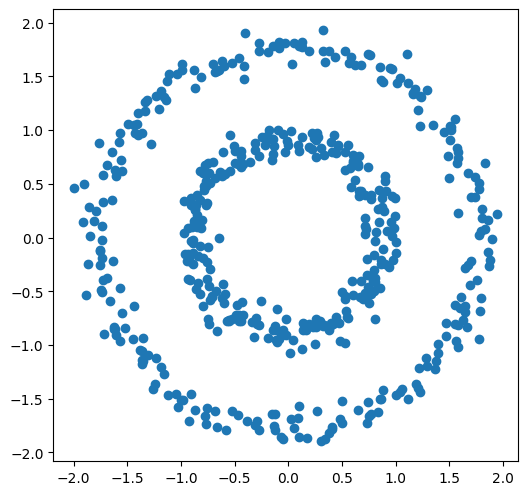

In [3]:
# 可视化散点
fig, ax = plt.subplots(figsize = (6,6))

plt.scatter(X[:,0],X[:,1])
ax.set_aspect('equal', adjustable='box')
# plt.savefig('散点图.svg')

## 成对距离矩阵

In [4]:
# 计算成对距离矩阵
D = np.linalg.norm(X[:, np.newaxis, :] - X, axis=2)
# 请尝试使用
# scipy.spatial.distance_matrix()
# sklearn.metrics.pairwise_distances()

<Axes: >

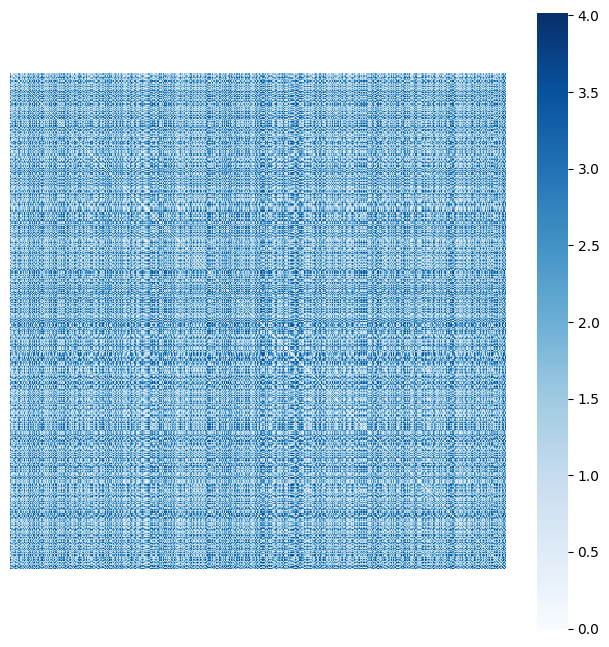

In [5]:
# 可视化成对距离矩阵
plt.figure(figsize=(8,8))
sns.heatmap(D, square = True, 
            cmap = 'Blues', 
            # annot=True, fmt=".3f",
            xticklabels = [], yticklabels = [])
# plt.savefig('成对距离矩阵_heatmap.svg')

## 相似度矩阵

In [ ]:
# 自定义高斯核函数
def gaussian_kernel(distance, sigma=1.0):
    return np.exp(- (distance ** 2) / (2 * sigma ** 2))

In [7]:
S = gaussian_kernel(D,3)
# 参数sigma设为3

<Axes: >

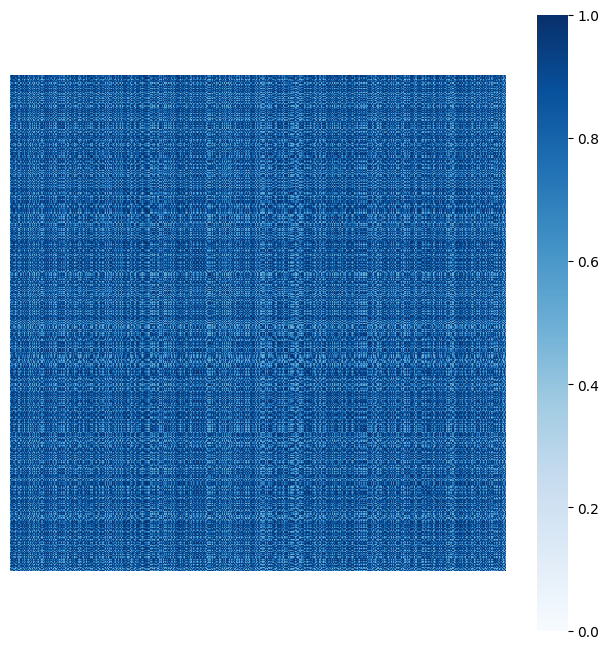

In [8]:
# 可视化亲近度矩阵
plt.figure(figsize=(8,8))
sns.heatmap(S, square = True, 
            cmap = 'viridis', vmin = 0, vmax = 1,
            # annot=True, fmt=".3f",
            xticklabels = [], yticklabels = [])
# plt.savefig('亲近度矩阵_heatmap.svg')

## 创建图

In [9]:
# 创建无向图
S_copy = np.copy(S)
np.fill_diagonal(S_copy, 0)
G = nx.Graph(S_copy, nodetype=int)
# 用邻接矩阵创建无向图

# 添加节点和边
for i in range(len(X)):
    G.add_node(i, pos=(X[i, 0], X[i, 1]))  

# 取出节点位置
pos = nx.get_node_attributes(G, 'pos')

# 增加节点属性
node_labels = {i: chr(ord('a') + i) for i in range(len(G.nodes))} 
edge_weights = [G[i][j]['weight'] for i, j in G.edges]

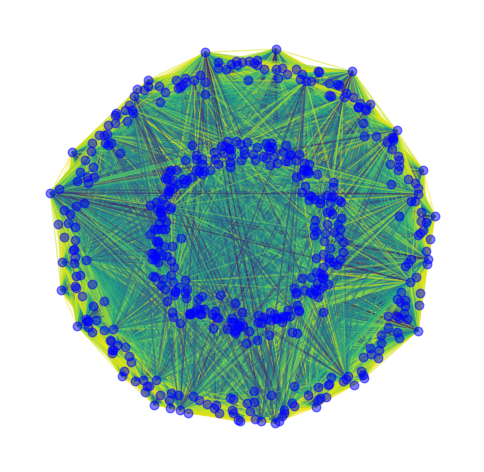

In [13]:
# 可视化图
fig, ax = plt.subplots(figsize = (6,6))
nx.draw_networkx(G, pos, with_labels=False, 
                 node_size=38, 
                 node_color='blue', 
                 font_color='black', 
                 edge_cmap=plt.cm.viridis,
                 edge_color=edge_weights,
                 width=1, alpha=0.5)

ax.set_aspect('equal', adjustable='box')
ax.axis('off')
# plt.savefig('成对距离矩阵_无向图.svg')

## 度矩阵

In [14]:
G = np.diag(S.sum(axis = 1))

<Axes: >

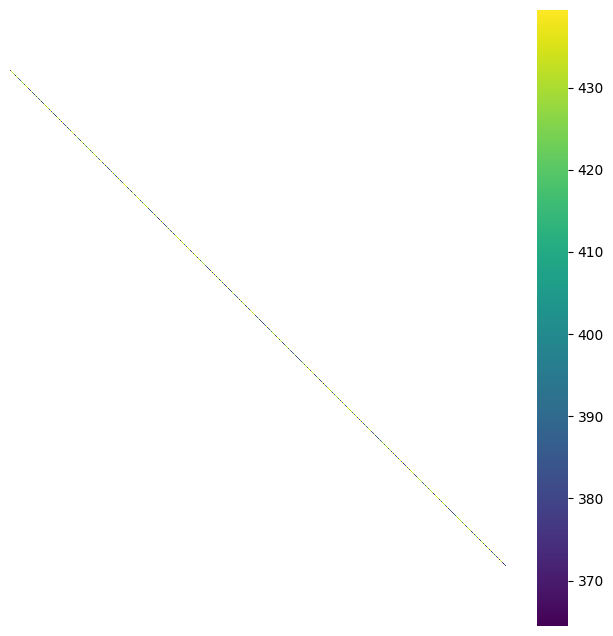

In [33]:
# 可视化度矩阵
plt.figure(figsize=(8,8))
sns.heatmap(G, square = True, 
            cmap = 'viridis', 
            # linecolor = 'k',
            # linewidths = 0.05,
            mask = 1-np.identity(len(G)),
            vmin = S.sum(axis = 1).min(),
            vmax = S.sum(axis = 1).max(),
            # annot=True, fmt=".3f",
            xticklabels = [], yticklabels = [])
# plt.savefig('度矩阵_heatmap.svg')

## 归一化对称拉普拉斯矩阵

In [21]:
G_inv_sqr = sqrtm(np.linalg.inv(G))

In [ ]:
L_s = G_inv_sqr @ (G - S) @ G_inv_sqr

<Axes: >

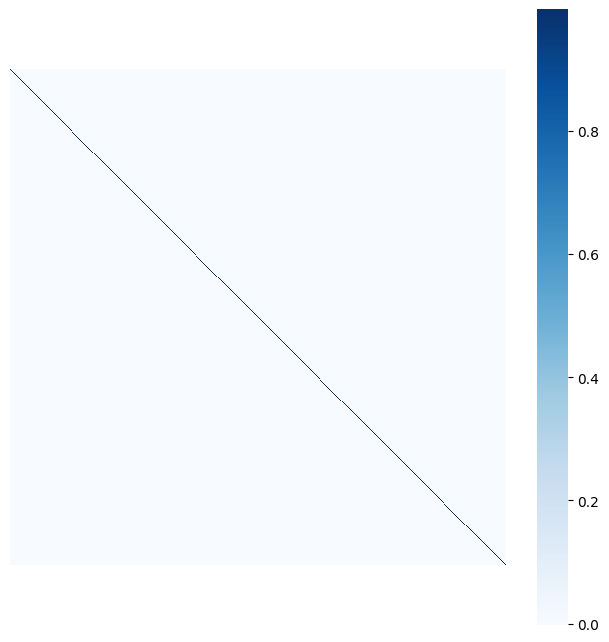

In [20]:
# 可视化拉普拉斯矩阵
plt.figure(figsize=(8,8))
sns.heatmap(L_s, square = True, 
            cmap = 'plasma', 
            # annot=True, fmt=".3f",
            xticklabels = [], yticklabels = [])
# plt.savefig('拉普拉斯矩阵_heatmap.svg')

## 特征值分解拉普拉斯矩阵

In [25]:
eigenValues_s, eigenVectors_s = np.linalg.eigh(L_s)
# 特征值分解

# 按特征值从小到大排序
idx_s = eigenValues_s.argsort() # [::-1]   
eigenValues_s = eigenValues_s[idx_s]
eigenVectors_s = eigenVectors_s[:,idx_s]

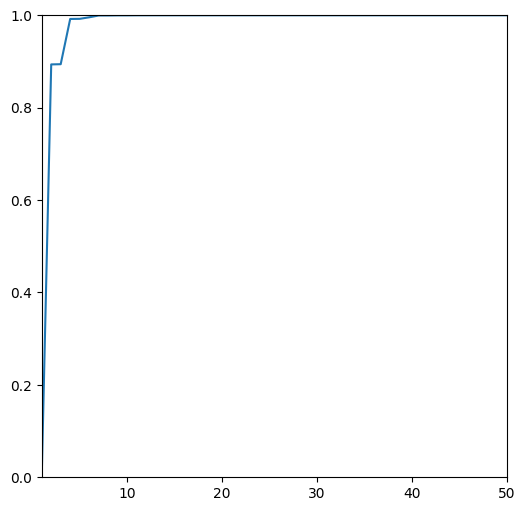

In [48]:
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(range(1,51),eigenValues_s[0:50])
ax.set_xlim(1,50)
ax.set_ylim(0,1)
# plt.savefig('特征值.svg')

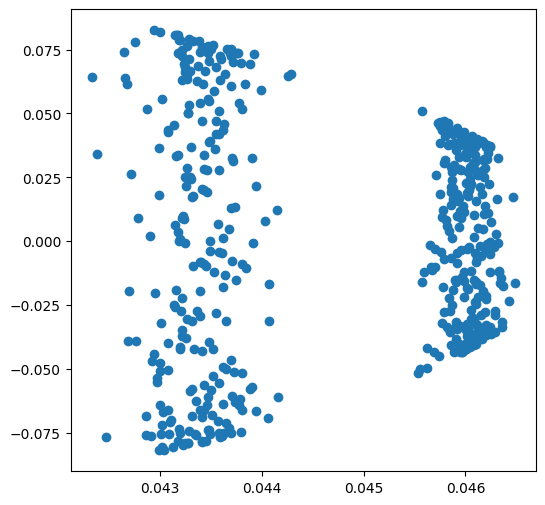

In [31]:
# 前两个特征向量的散点图
fig, ax = plt.subplots(figsize = (6,6))

plt.scatter(eigenVectors_s[:,0], eigenVectors_s[:,1])
# plt.savefig('散点图，投影后.svg')